## 1. Logistic Regression

### 1.1 Theoretical part 

The name contains "regression", but it's actuaaly a classfying method, which be mainly uesd in two-classifies qustion. 
It utilizes the Logistic function (sigmoid function).
$$ Logi(z) = \frac{1}{1 + e^{-z}}$$

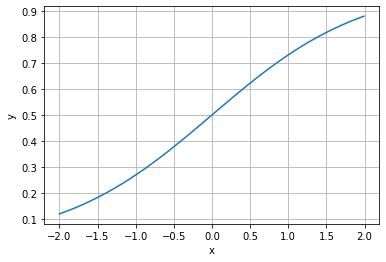

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-2,2,0.01)
y = 1 / (1+np.exp(-x))
plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('y')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The function is strictly increased and the value range is from 0 to 1, when y=0, the corresponding x=0.5
Note that,
for a regression equation, 
$$ z = w_0 + \sum_{i}^{N} w_i x_i $$
, plug into the above Logistic equation, it becomes to,
$$ p=p(y=1|x,\theta) = h_{\theta}(x,\theta) = \frac{1}{1+e^{-(w_0+ \sum_{i}^{N} w_ix_i)}}$$
Thus, 
$$ p (y=1|x,\theta) = h_\theta(x, \theta)$$
 and 
 $$ p(y=0|x,\theta) = 1 - h_\theta(x,\theta)$$

From the view of its principle, the LR shapes a decision boundary where it decides: \
For the decision function, \
when $z \geq 0$, $y \geq 0.5$, classy type 1;\
when $z \le 0$, $y \le 0.5$, classy type 0;\
The $y$ value could be regarded as the probability of classified as type 1.
\
From the view of model training, it use data to solve the LR model to get a specific $w$.

[confused] For multiple classification, it is achieved by combining multiple two classification LR. 

### 1.2 Practical part 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [2]:
## Pkg Loading
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

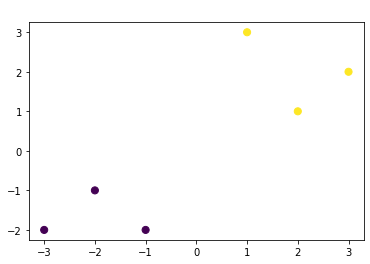

The weight of LR: [[0.73455784 0.69539712]]
The intercept(w0) of LR: [-0.13139986]


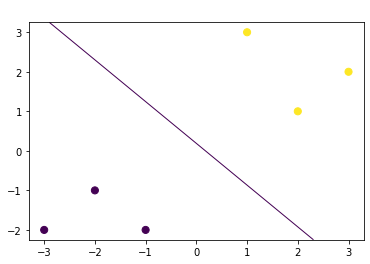

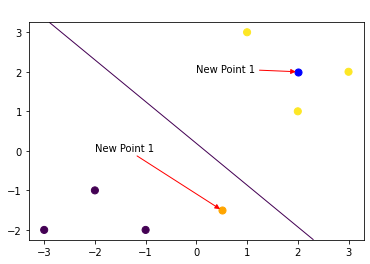

The new point 1 predict class: type  [0]
The new point 2 predict class: type  [1]
The New point 1 predict Probability of each class:
 [[0.69151607 0.30848393]]
The New point 2 predict Probability of each class:
 [[0.06131186 0.93868814]]


In [3]:
## Model Training

### Construct Dataset
x_features = np.array([[-1,-2],[-2,-1],[-3,-2],[1,3],[2,1],[3,2]])
y_label = np.array([0,0,0,1,1,1])

### Visualization 
plt.figure()
plt.scatter(x_features[:,0], x_features[:,1], c=y_label, s=50)
plt.title("Training Dataset", c="white")
plt.show()

### Use LR model
lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(x_features, y_label)

#### Check Parameters
print('The weight of LR:', lr_clf.coef_)
print('The intercept(w0) of LR:', lr_clf.intercept_)

### Visualization of decision boundary
plt.figure()
plt.scatter(x_features[:,0], x_features[:,1], c=y_label, s=50)
plt.title("Training Dataset with LR", c="white")
nx, ny = 200, 200
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny))
z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
# ravel is equivalent to reshape(-1, order=order)
z_proba = z_proba[:,1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=1.)

plt.show()

### Visualization of new samples
# new point 1
x_features_new1 = np.array([[0.5, -1.5]])
plt.scatter(x_features_new1[:,0], x_features_new1[:,1], s=50, c="orange")
plt.annotate(text="New Point 1", xy=(0.5,-1.5), xytext=(-2,0),arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

# new point 2
x_features_new2 = np.array([[2, 2]])
plt.scatter(x_features_new2[:,0], x_features_new2[:,1], s=50, c="blue")
plt.annotate(text="New Point 1", xy=(2,2), xytext=(0,2),arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

# Visualization
plt.scatter(x_features[:,0], x_features[:,1], c=y_label, s=50)
plt.title("Training Dataset (add new samples)", c="white")
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=1.)
plt.show()

## Prediction for new samples
y_label_new1 = lr_clf.predict(x_features_new1)
y_label_new2 = lr_clf.predict(x_features_new2)
print('The new point 1 predict class: type ', y_label_new1)
print('The new point 2 predict class: type ', y_label_new2)

## Due to the LR is a probabilistic predictive model（p = p(y=1|x,\theta)）,
# use `predict_proba`` function to predict its probability
y_label_new1_predict_proba = lr_clf.predict_proba(x_features_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_features_new2)

print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)




### 1.2.2 Use iris dataset

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## sepal length	
## sepal width	
## petal length	
## petal width	
## target types: 'setosa'(0), 'versicolor'(1), 'virginica'(2)
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_target = iris_data.target
iris_features = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_features.info()
iris_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
pd.Series(iris_target).value_counts()

0    50
1    50
2    50
dtype: int64

In [8]:
#iris_features.describe()

### EDA

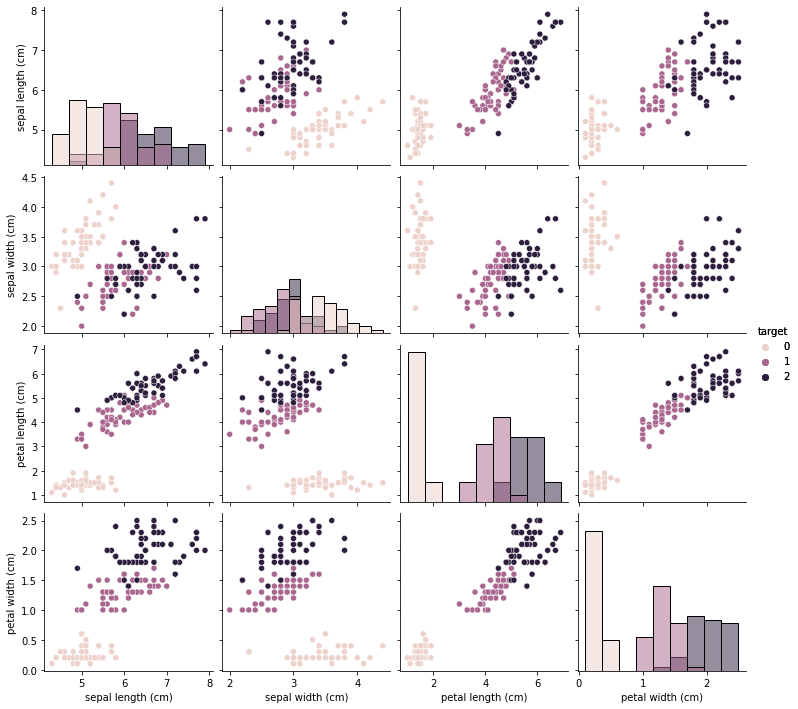

In [9]:
iris_all = iris_features.copy()
iris_all['target'] = iris_target
pp = sns.pairplot(data=iris_all, diag_kind='hist',hue='target')
pp.add_legend()
plt.show()

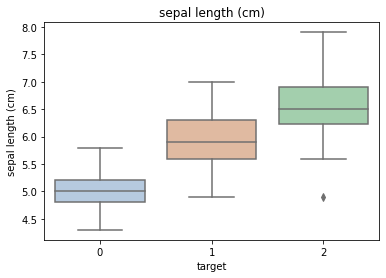

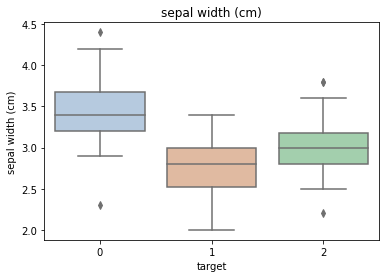

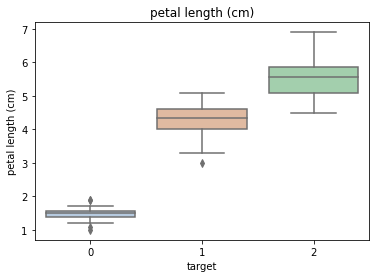

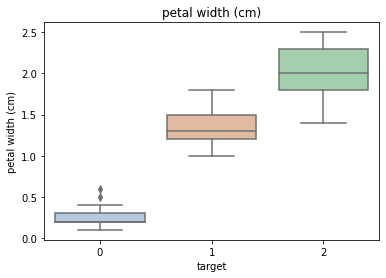

In [10]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=.5, palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

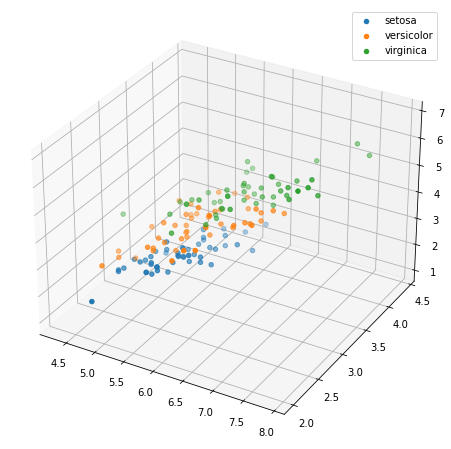

In [11]:
# select top 3 features to plot 3D scatters 
# from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

Notes: slover, metrics, confusion matrix

Two-Class LR

In [12]:
### LR Model Training
### Two classes
from sklearn.model_selection import train_test_split
# Train & Test
# class 0 and 1
iris_class0and1 = iris_all[(iris_all['target']==0) | (iris_all['target']==1)]
iris_features_class0and1 = iris_class0and1.iloc[:,:-1]
iris_features_target = iris_class0and1.iloc[:,-1]

### Train : Test = 2 : 8
x_tr, x_te, y_tr, y_te = train_test_split(iris_features_class0and1, 
iris_features_target, test_size=0.2, random_state=2022)
# LR model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs') # solver
# Train
clf.fit(x_tr, y_tr)
### Check Parameters
print('The weight of LR:', clf.coef_)
print('The intercept(w0) of LR:', clf.intercept_)

The weight of LR: [[ 0.51073271 -0.70523961  2.15626583  0.92665906]]
The intercept(w0) of LR: [-7.37784253]


The accuracy of the LR is(train):  1.0
The accuracy of the LR is(test):  1.0
The confusion matrix result: 
 [[ 7  0]
 [ 0 13]]


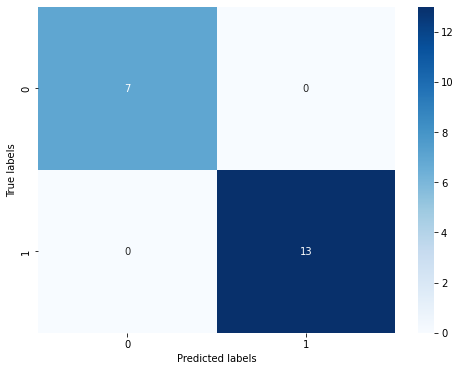

In [13]:
### Prediction
tr_predict = clf.predict(x_tr)
te_predict = clf.predict(x_te)

### Evaluation
from sklearn import metrics

print('The accuracy of the LR is(train): ', metrics.accuracy_score(y_tr, tr_predict))
print('The accuracy of the LR is(test): ', metrics.accuracy_score(y_te, te_predict))

# confusion_matrix
confusion_matrix_result = metrics.confusion_matrix(te_predict, y_te)
print('The confusion matrix result: \n', confusion_matrix_result)
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Three-Class LR

In [14]:
### Train : Test = 2 : 8
iris_features = iris_all.iloc[:,:-1]
iris_target = iris_all.iloc[:,-1]
x_tr, x_te, y_tr, y_te = train_test_split(iris_features, iris_target, test_size=0.2, random_state=2020)
## LR
clf = LogisticRegression(random_state=0, solver='lbfgs')
## Train
clf.fit(x_tr, y_tr)

LogisticRegression(random_state=0)

In [15]:
#### Check Parameters
print('The weight of LR:', clf.coef_)
print('The intercept(w0) of LR:', clf.intercept_)

### Prediction
tr_predict = clf.predict(x_tr)
te_predict = clf.predict(x_te)

### Evaluation
from sklearn import metrics

print('The accuracy of the LR is(train): ', metrics.accuracy_score(y_tr, tr_predict))
print('The accuracy of the LR is(test): ', metrics.accuracy_score(y_te, te_predict))

train_predict_proba = clf.predict_proba(x_tr)
test_predict_proba = clf.predict_proba(x_te)
print('The test predict Probability of each class:\n',test_predict_proba[:5,:])

The weight of LR: [[-0.45928925  0.83069883 -2.26606532 -0.9974398 ]
 [ 0.33117319 -0.72863421 -0.06841147 -0.9871103 ]
 [ 0.12811607 -0.10206462  2.3344768   1.9845501 ]]
The intercept(w0) of LR: [  9.43880687   3.93047363 -13.3692805 ]
The accuracy of the LR is(train):  0.9833333333333333
The accuracy of the LR is(test):  0.8666666666666667
The test predict Probability of each class:
 [[1.03461731e-05 2.33279473e-02 9.76661707e-01]
 [9.69926591e-01 3.00732876e-02 1.21676990e-07]
 [2.09992545e-02 8.69156619e-01 1.09844127e-01]
 [3.61934867e-03 7.91979966e-01 2.04400685e-01]
 [7.90943192e-03 8.00605301e-01 1.91485267e-01]]


In [19]:
tr_predict

array([2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2,
       0, 0, 1, 2, 2, 1, 2, 1, 2, 1])

The confusion matrix result: 
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


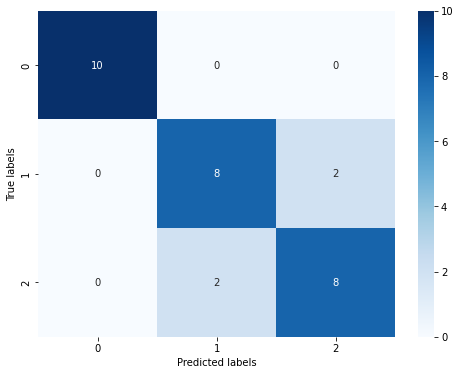

In [16]:
# confusion_matrix
confusion_matrix_result = metrics.confusion_matrix(te_predict, y_te)
print('The confusion matrix result: \n', confusion_matrix_result)
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

通过结果我们可以发现，其在三分类的结果的预测准确度上有所下降，其在测试集上的准确度为: 
86.67%，这是由于'versicolor'（1）和 'virginica'（2）这两个类别的特征被部分错误分辨，这一发现通过可视化结果得到验证。两类特征的边界具有一定的模糊性（边界类别混杂，没有明显区分边界），所以在这两类的预测上出现了一定的错误。

Through the results, we can find that the prediction accuracy of the three-category results has declined, and its accuracy on the test set is:6.67%, which is due to the fact that the features of the two classes 'versicolor' (1) and 'virginica' (2) are partially misidentified, this finding verified by the visualization results. The boundary between the two types of features has a certain degree of ambiguity (the boundary categories are mixed, and there is no obvious distinction between the boundaries), so certain errors have occurred in the prediction of these two types.